### 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data import

In [2]:
df = pd.read_csv('input/churn_data.csv')

### 3. Data cleaning

In [3]:
df

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,580.0,0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1


In [4]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [7]:
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
df = df[pd.notnull(df['age'])] #get rid of null rows in 'age' column

In [10]:
df = df.drop(columns=['credit_score', 'rewards_earned']) #get rid of rows with a lot of null values

### 4. Feature histograms

In [11]:
df2 = df.drop( columns=['user', 'churn'] ) #drop columns 'user' (not needed) and 'churn' (response rate)

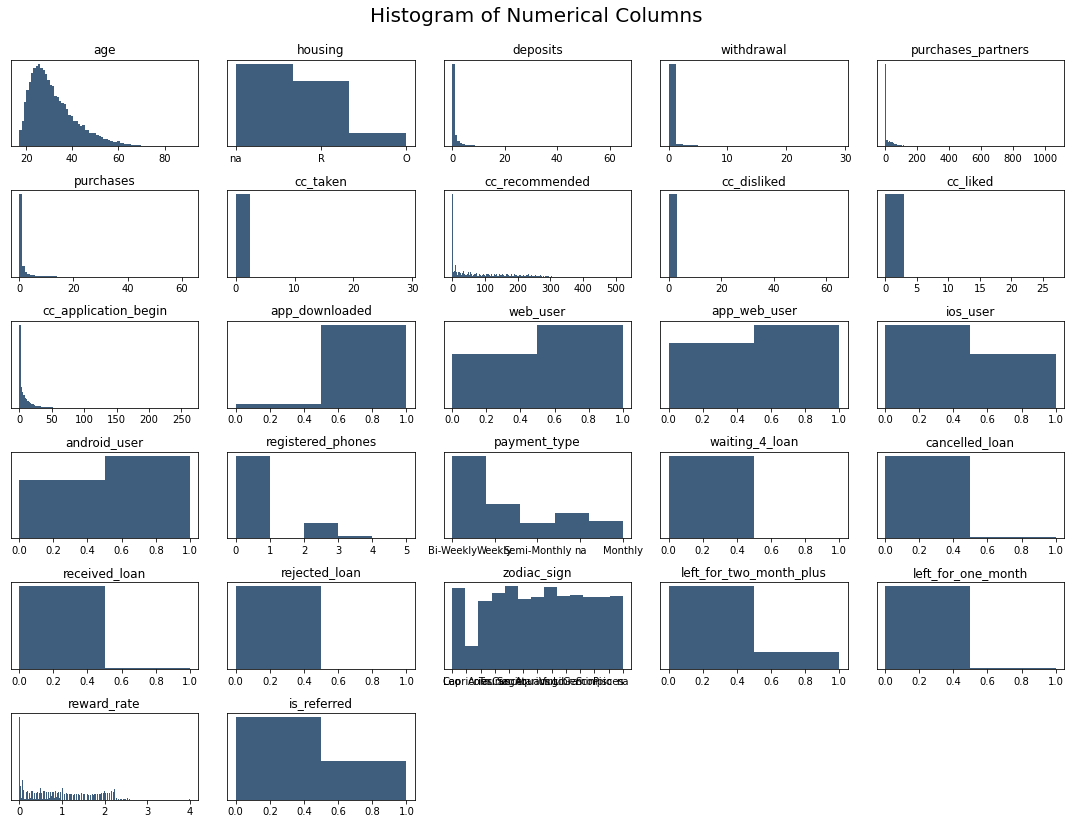

In [12]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1] + 1): #iterating over the columns
    plt.subplot(6, 5, i)
    f = plt.gca() #gca = get current axes
    f.axes.get_yaxis().set_visible(False) #set y-axes invisible
    f.set_title(df2.columns.values[i - 1]) #add title to the plot
    
    vals = np.size(df2.iloc[:, i - 1].unique()) #take all rows for specific column, select unique values
    
    plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#age - most users are between 20 and 30 years old
#housing - much more users rent than own a house, but most of them are unclassified
#deposits - how many times user made a deposit: most of them never made it
#withdrawal - how many times user withdrew money: most of them never made it
#purchases_partners - how many purchases user did within partner stores: most of them never made it
#purchases - how many purchases user did outside partner stores: most of them never made it
#cc_taken - how many credit cards user took: majority have 0 or 1
#cc_recommended - how many times user was recommended a credit card: majority was never recommended
#cc_disliked - if user disliked credit card: majority never disliked it
#cc_liked - if user liked credit card: majority never liked it
#cc_application_begin - whether or not person began credit card application: majority never began it
#app_downloaded - if app was downloaded: only very few haven't downloaded the app
#web_user - if web was used
#app_web_user - if app and web were used
#ios_user - if app user was ios user
#android_user - if app user was android user
#registered_phones - whether or not user registered more than one phone, if so - how many, zero if one phone is registered: majority have just 1 registered
#payment_type - frequency how often uses gets paid: bi-weekly is the most common type
#waiting_4_loan - user is waiting for loan
#cancelled_loan - whether user in the past cancelled loan
#received_loan - whether user in the past received loan
#rejected_loan - whether user in the past rejected loan
#zodiac_sign - user zodiac sign: mostly evenly distributed but we can investigate Capricorn which is not highly represented
#left_for_two_month_plus - whether user left for two months or more and came back
#left_for_one_month_plus - whether user left for one month or more and came back
#rewards_earned - how many points user earned
#is_referred - whether user was referred by somebody else

### 5. Pie plots

In [20]:
df2 = df[[
    'housing',
    'app_downloaded',
    'web_user',
    'app_web_user',
    'ios_user',
    'android_user',
    'registered_phones',
    'payment_type',
    'waiting_4_loan',
    'cancelled_loan',
    'received_loan',
    'rejected_loan',
    'zodiac_sign',
    'left_for_two_month_plus',
    'left_for_one_month',
    'is_referred'
]]

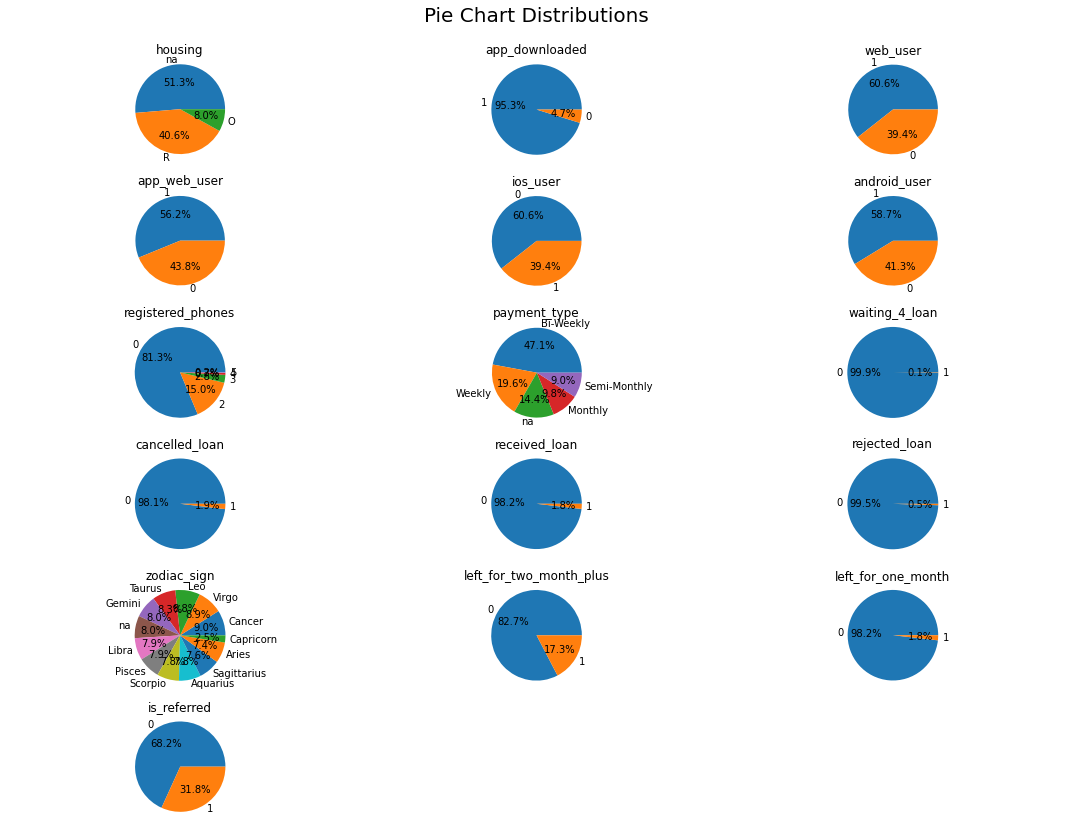

In [22]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1): #iterating over the columns
    plt.subplot(6, 3, i)
    f = plt.gca() #gca = get current axes
    f.axes.get_yaxis().set_visible(False) #set y-axes invisible
    f.set_title(df2.columns.values[i - 1]) #add title to the plot
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
        
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [27]:
df[ df2['waiting_4_loan'] == 1 ].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [28]:
df[ df2['cancelled_loan'] == 1 ].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [29]:
df[ df2['received_loan'] == 1 ].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [31]:
df[ df2['left_for_one_month'] == 1 ].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### 6. Exploring Uneven Features

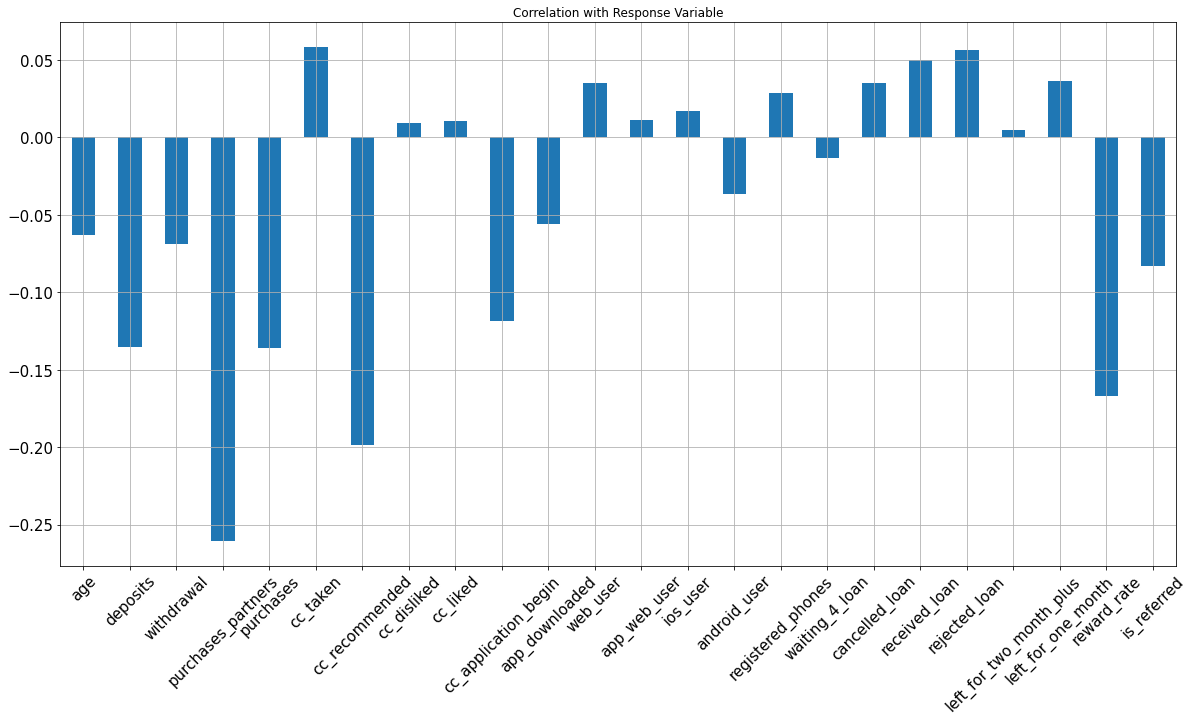

In [32]:
df.drop(columns = ['churn', 'user', 'housing',
                   'payment_type', 'zodiac_sign']).corrwith(df['churn']).plot.bar(
    figsize = (20, 10), title = 'Correlation with Response Variable', fontsize = 15,
    rot = 45, grid = True) #drop unnecessary columns (response variable, categorical variables etc.)

### 7. Correlation Matrix

In [33]:
corr = df.drop( columns = ['user', 'churn'] ).corr() #compute correlation matrix

In [34]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True #generate mask for upper triangle

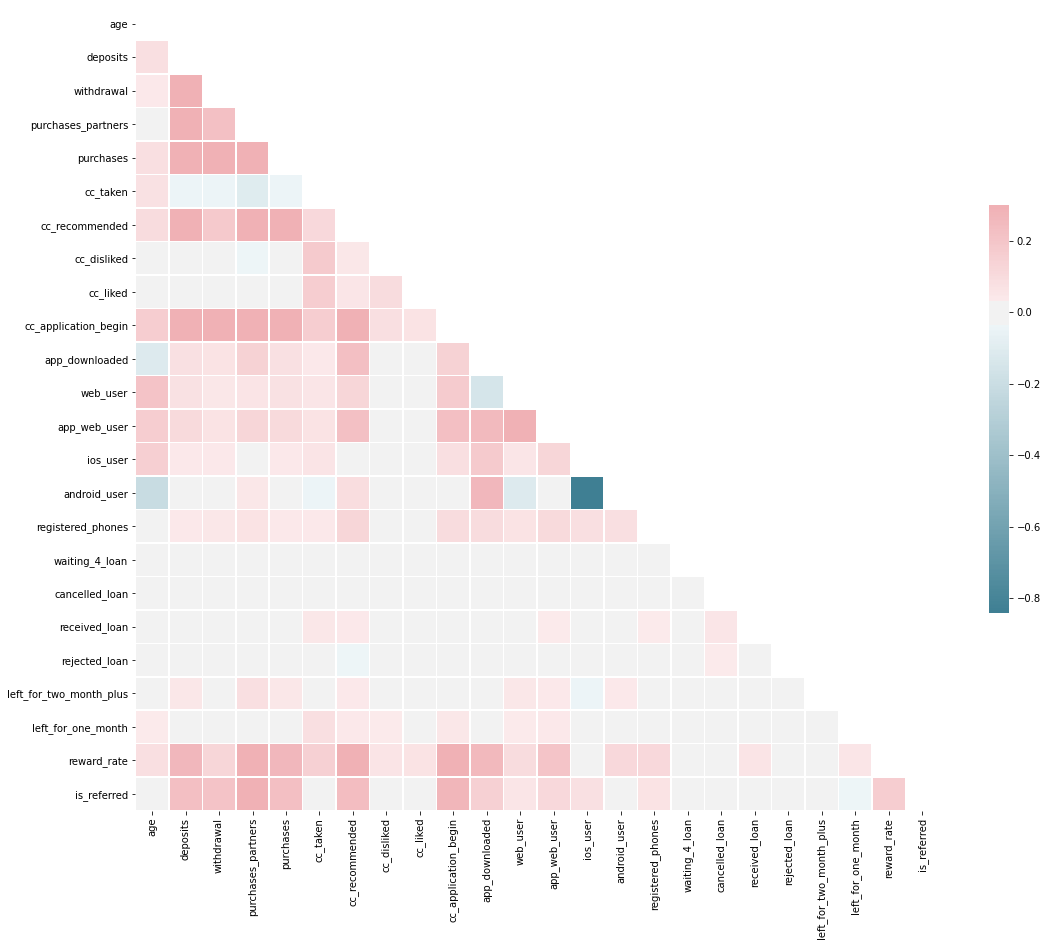

In [38]:
f, ax = plt.subplots(figsize = (18, 15)) #set up matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap = True) #generate custom diverging colormap
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
           square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5}); #draw map with mask and correct aspect ratio

In [39]:
df = df.drop(columns = ['app_web_user'])

In [40]:
df.to_csv('new_churn_data.csv', index = False)